### Part A: Conceptual Questions

Answer briefly:
#### 1. What is a Decision Tree and how does it make decisions?
A Decision Tree is a supervised learning algorithm that makes decisions by splitting data into branches based on feature values, ultimately leading to a prediction at the leaf nodes. It works by asking a sequence of “yes/no” or threshold-based questions until it reaches a final outcome.

    - Select the best feature to split the dataset (using metrics like Gini Index, Entropy, or Mean Squared Error).
    - Split recursively into subsets, forming branches.
    - Stop splitting when criteria are met (e.g., max depth, minimum samples).
    - Assign predictions at leaf nodes.



#### 2. What does a split criterion mean in a Decision Tree?

Split Criterion in a Decision Tree

A split criterion is the mathematical rule used to decide which feature and threshold should be chosen at each node to split the dataset into subsets. The goal is to make the resulting groups as “pure” as possible — meaning the data in each branch is more homogeneous with respect to the target variable.

For Classification Trees:
- Gini Index
    - Measures impurity.
    - Lower Gini = purer node.

- Entropy / Information Gain
    - Entropy measures disorder
    - Information Gain = reduction in entropy after a split.
    - Higher Information Gain = better split.

For Regression Trees:
- Mean Squared Error (MSE)
    - Splits are chosen to minimize variance in child nodes.


#### 3. Difference between Gini Impurity and Entropy.
Gini Impurity
- Measures the probability of misclassifying a randomly chosen sample.
- Computationally faster since it avoids logarithms, making it the default in CART.

Entropy
- Measures the amount of disorder/uncertainty in the node.
- Requires logarithmic calculations, slightly slower but used in ID3/C4.5 for Information Gain


#### 4. Why do Decision Trees tend to overfit?
- Too many splits (high variance)
    - Decision trees keep splitting until they perfectly classify the training data.
    - This creates very deep trees that capture noise and outliers instead of general patterns.
- Lack of regularization by default
    - If you don’t set constraints (like max_depth, min_samples_split, or pruning), the tree grows unchecked.
    - This makes the model overly complex and less able to generalize to unseen data.


#### 5. What role does the max_depth parameter play?
- max_depth limits how deep the decision tree can grow, controlling complexity.
- It’s a regularization parameter that prevents overfitting by stopping the tree from becoming too detailed.


### Part B: Data Exploration
1. Load the dataset and display:
- Shape of the dataset
- Column names
- First 5 rows
   
2. Identify:
- Target column
- Feature columns

3. Check and report:
- Missing values
- Data types


In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv(r"C:\Users\sharw\OneDrive\Desktop\ML\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
X=df.drop('target',axis=1) #features
y=df['target'] #target

In [6]:
X.shape, y.shape

((1025, 13), (1025,))

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated().sum()

723

In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(302, 14)

### Part C: Data Preprocessing
1. Handle missing values (if any).

2. Separate:

    Features (X)

    Target (y)

4. Split the dataset:

    Training set – 80%

    Testing set – 20%

    Use random_state=42


In [12]:
#No missing values

In [13]:
X=df.drop('target',axis=1) #features
y=df['target'] #target

In [14]:
X.shape,y.shape

((302, 13), (302,))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241,), (61,))

In [18]:
#one hot encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
ohe=OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ohe

OneHotEncoder(drop='first', sparse_output=False)

In [21]:
ohe.fit_transform(df[['cp', 'thal', 'restecg']])

,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,restecg_1,restecg_2
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
723,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
733,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
739,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
843,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [22]:
from sklearn.compose import ColumnTransformer

In [23]:
ct=ColumnTransformer(
    [
    ('OHE',ohe,['cp', 'thal', 'restecg'])
    ], remainder='passthrough', 
    verbose_feature_names_out=False
).set_output(transform='pandas')


In [24]:
X_train_transformed=ct.fit_transform(X_train)

In [25]:
X_train_transformed.head()

,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,restecg_1,restecg_2,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca
163,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,48,1,124,274,0,166,0,0.5,1,0
291,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,58,1,128,259,0,130,1,3.0,1,2
280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,45,0,130,234,0,175,0,0.6,1,0
85,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,44,1,120,220,0,170,0,0.0,2,0
239,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,62,0,150,244,0,154,1,1.4,1,0


### Part D: Model Building
1. Create a Decision Tree Classifier with:
- criterion='gini'
- random_state=42

2. Train the model on training data.
3. Predict on the test data.


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt=DecisionTreeClassifier(criterion='gini',random_state=42)

In [28]:
dt.fit(X_train_transformed,y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
#X_test transform 
X_test_transformed=ct.transform(X_test)

In [77]:
y_pred=dt.predict(X_test_transformed)

In [31]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [44]:
from sklearn.tree import plot_tree

In [45]:
import matplotlib.pyplot as plt 

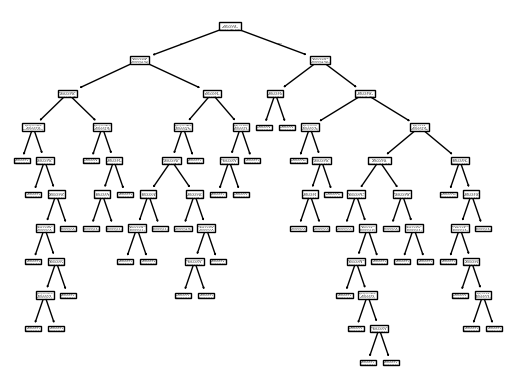

In [46]:
plot_tree(dt) 
plt.show()

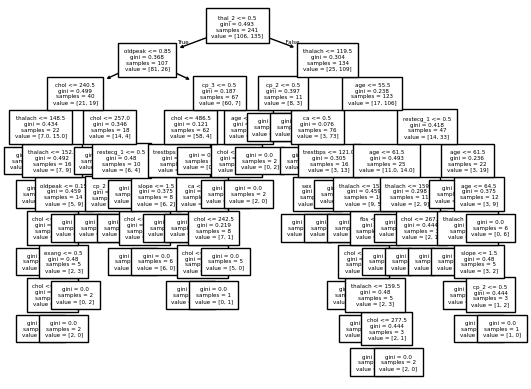

In [49]:
plot_tree(dt,feature_names=X_train_transformed.columns,fontsize=4) 
plt.show()

### Part E: Model Evaluation
1. Compute:

    Accuracy score


   Confusion matrix (visit this after evaluation metrics for classification are taught)


    Classification report (visit this after evaluation metrics for classification are taught)

3. Answer:


    Which class is predicted better?


    Is the model overfitting or underfitting?


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.6885245901639344

In [37]:
dt.score(X_train_transformed,y_train)

1.0

In [78]:
dt.score(X_test_transformed,y_test)

0.6885245901639344

#### confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_pred,y_test)

array([[20,  7],
       [12, 22]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.74      0.68        27
           1       0.76      0.65      0.70        34

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.70      0.69      0.69        61



Which class is predicted better?

Class 1 (Disease) is predicted better overall, because it has higher precision and a slightly higher F1-score compared to Class 0.

Is the model overfitting or underfitting?
- Training Accuracy: 1.00
- Test Accuracy: 0.6885
- overfitting — the model memorized training data but struggles on unseen data.


### Part F: Understanding Tree Depth (Manual Experiment)

We train three Decision Tree models by varying only the `max_depth` parameter:

| Model   | max_depth |
|---------|-----------|
| Model 1 | 2         |
| Model 2 | 5         |
| Model 3 | None      |


For each model, record:

    Training accuracy
    Testing accuracy

Answer:

What happens when the tree is very shallow?

What happens when the tree is very deep?

Which model performs best and why?



In [50]:
# Model 1: max_depth=2
dt1=DecisionTreeClassifier(max_depth=2,random_state=42)
dt1

DecisionTreeClassifier(max_depth=2, random_state=42)

In [51]:
dt1.fit(X_train_transformed,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [52]:
dt1.score(X_train_transformed,y_train)

0.8091286307053942

In [79]:
dt1.score(X_test_transformed,y_test)

0.6721311475409836

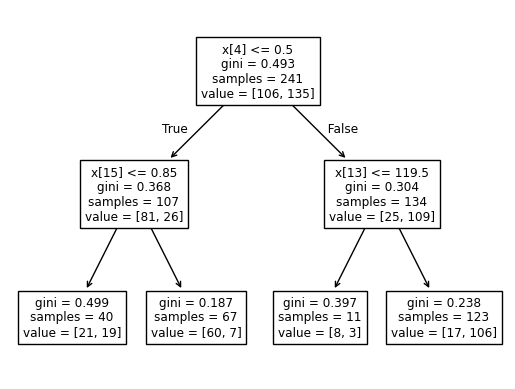

In [66]:
plot_tree(dt1) 
plt.show()

In [54]:
#Model 2 maxdepth=5

In [55]:
dt2=DecisionTreeClassifier(max_depth=5,random_state=42)
dt2

DecisionTreeClassifier(max_depth=5, random_state=42)

In [56]:
dt2.fit(X_train_transformed,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [57]:
dt2.score(X_train_transformed,y_train)

0.9128630705394191

In [80]:
dt2.score(X_test_transformed,y_test)

0.7540983606557377

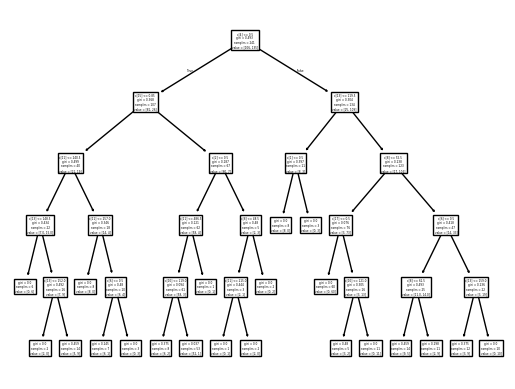

In [65]:
plot_tree(dt2) 
plt.show()

In [67]:
#model 3 maxdepth=none

In [59]:
dt3=DecisionTreeClassifier(max_depth=None,random_state=42)
dt3

DecisionTreeClassifier(random_state=42)

In [60]:
dt3.fit(X_train_transformed,y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
dt3.score(X_train_transformed,y_train)

1.0

In [81]:
dt3.score(X_test_transformed,y_test)

0.6885245901639344

- What happens when the tree is very shallow (Model 1, depth=2)?
    - Training accuracy is low (underfitting).
    - Test accuracy is also low, because the tree is too simple and misses patterns.

- What happens when the tree is very deep (Model 3, depth=None)?
    - Training accuracy is perfect (1.0).
    - Test accuracy drops, showing overfitting (memorizes training data, poor generalization)

- Which model performs best and why?
    - Model 2 (depth=5) performs best.
    - It balances complexity: not too shallow (avoids underfitting), not too deep (avoids overfitting).
    - Training accuracy is high but not perfect, and test accuracy is better than both shallow and deep extremes.


### Part G: Tree Visualization
Visualize one Decision Tree (choose the best-performing one).

    Include:
    Feature names
    Class names


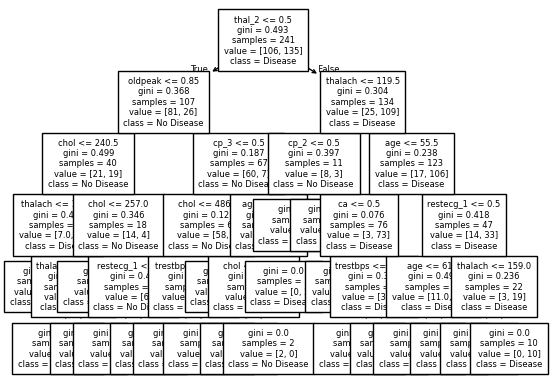

In [69]:
plot_tree(dt2,feature_names=X_train_transformed.columns,class_names=["No Disease", "Disease"],fontsize=6) 
plt.show()

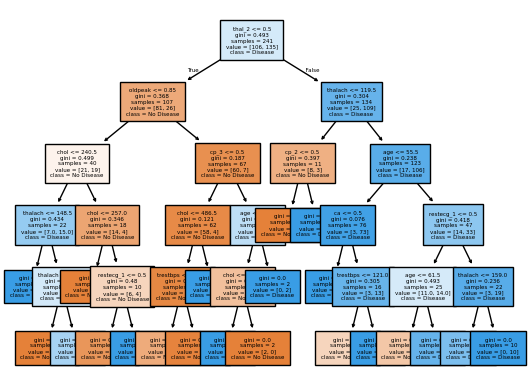

In [71]:
plot_tree(dt2,feature_names=X_train_transformed.columns,class_names=["No Disease", "Disease"],filled=True,fontsize=4) 
plt.show()

### Part H: Reflection Questions
    Why are Decision Trees suitable for medical datasets?
    What makes Decision Trees easy to interpret?
    Why are Decision Trees commonly used in ensemble methods?


**1. Why are Decision Trees suitable for medical datasets?**  
- Handle mixed data types (numerical + categorical).  
- Capture non-linear relationships and feature interactions.  
- Robust to missing values.  
- Highlight important features for diagnosis.

**2. What makes Decision Trees easy to interpret?**  
- Mimic human decision-making with clear rules.  
- Visualizations show thresholds and splits.  
- Transparent paths from root to leaf.  
- Understandable by clinicians and non-technical users.

**3. Why are Decision Trees commonly used in ensemble methods?**  
- Individual trees are unstable, ensembles stabilize them.  
- Random Forests/Boosting improve accuracy and reduce variance.  
- Trees are fast to train and combine.  
- Diversity of trees captures both broad and fine patterns.


### Finally Check with these below parameter

Compare criterion='gini' vs criterion='entropy'

Try min_samples_leaf manually

Write a short conclusion

Proper markdown explanations required


In [72]:
dt_gini= DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
dt_gini

DecisionTreeClassifier(max_depth=5, random_state=42)

In [73]:
dt_gini.fit(X_train_transformed, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [74]:
dt_gini.score(X_train_transformed, y_train)

0.9128630705394191

In [82]:
dt_gini.score(X_test_transformed, y_test)

0.7540983606557377

In [83]:
dt_entropy= DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
dt_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [84]:
dt_entropy.fit(X_train_transformed, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [85]:
dt_entropy.score(X_train_transformed, y_train)

0.9004149377593361

In [86]:
dt_entropy.score(X_test_transformed, y_test)

0.6557377049180327

### Criterion Comparison
- **Gini**: Faster to compute, measures impurity by misclassification probability.
- **Entropy**: Uses information gain, slightly more computationally expensive.
- **Result**: Both usually give similar accuracy; Gini is often preferred for speed, Entropy for theory.

In [87]:
# Try different min_samples_leaf values
for leaf in [1, 5, 10]:
    dt_leaf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=leaf, random_state=42)
    dt_leaf.fit(X_train_transformed, y_train)
    print(f"Leaf={leaf} Train Acc:", dt_leaf.score(X_train_transformed, y_train))
    print(f"Leaf={leaf} Test Acc:", dt_leaf.score(X_test_transformed, y_test))

Leaf=1 Train Acc: 0.9128630705394191
Leaf=1 Test Acc: 0.7540983606557377
Leaf=5 Train Acc: 0.8838174273858921
Leaf=5 Test Acc: 0.6721311475409836
Leaf=10 Train Acc: 0.8589211618257261
Leaf=10 Test Acc: 0.7049180327868853


### Effect of min_samples_leaf
- **Leaf=1**: Very small leaves, risk of overfitting.
- **Leaf=5**: Smoother tree, better generalization.
- **Leaf=10**: Larger leaves, higher bias but reduced variance.

### Conclusion
- **Criterion**: Gini and Entropy produce similar results; Gini is faster, Entropy is more theoretical.
- **Tree Depth**: Shallow trees underfit, very deep trees overfit; moderate depth balances bias and variance.
- **min_samples_leaf**: Increasing this parameter reduces overfitting by forcing larger, more general leaves.
- **Best Practice**: Use cross-validation to tune `max_depth` and `min_samples_leaf`.
- **Overall**: Decision Trees are interpretable and flexible. With proper tuning, they balance accuracy and generalization, making them suitable for medical datasets.